In [31]:
from shazam import shazam

samplesperseg = 1024

# The number of samples to overlap between adjacent segments
samplesoverlap = samplesperseg // 8

NFFT_n = samplesperseg

# Define the neighborhood size:
window_size = 50

# target zone offset in seconds
targetzone_offset = 0.1

# target zone width in seconds
targetzone_width = 10

# target zone height in frequency
targetzone_height = 1000

shazam_obj = shazam(samplesperseg, samplesoverlap, NFFT_n, window_size, targetzone_width, targetzone_height, targetzone_offset)

In [32]:
# build database

songs_folders = [
    # r'C:\Users\Kuldeep\OneDrive\Desktop\Studies\Semester 2\MS\library1',
    # r'C:\Users\Kuldeep\OneDrive\Desktop\Studies\Semester 2\MS\library2'
    'library1',
    'library2',
    #'library3'
]

dbfile_path = 'fingerprint_database.db'
shazam_obj.build_database(songs_folders, dbfile_path)

Database connection open.
	 Processing folder : library1
		 
 Processing 01. Bourgade.wav in library1
		 Reading song in library1\01. Bourgade.wav
		 creating spectrogram
		 creating constellations
		 generate  5586  combinatorialhashes
		 adding fingerprints to database
		 time taken for song 01. Bourgade.wav is : 0.038236 minutes.
		 
 Processing 02. For the Better.wav in library1
		 Reading song in library1\02. For the Better.wav
		 creating spectrogram
		 creating constellations
		 generate  4858  combinatorialhashes
		 adding fingerprints to database
		 time taken for song 02. For the Better.wav is : 0.029806 minutes.
		 
 Processing 03. PRoGReSSeD.wav in library1
		 Reading song in library1\03. PRoGReSSeD.wav
		 creating spectrogram
		 creating constellations
		 generate  5758  combinatorialhashes
		 adding fingerprints to database
		 time taken for song 03. PRoGReSSeD.wav is : 0.048874 minutes.
		 
 Processing 04. Arcade Playroom.wav in library1
		 Reading song in library1\04. A

In [33]:
from shazam import shazam

samplesperseg = 1024

# The number of samples to overlap between adjacent segments
samplesoverlap = samplesperseg // 8

NFFT_n = samplesperseg

# Define the neighborhood size:
window_size = 50

# target zone width in seconds
targetzone_width = 10

# target zone height in frequency
targetzone_height = 1000

# target zone offset in seconds
targetzone_offset = 0.1

shazam_obj = shazam(samplesperseg, samplesoverlap, NFFT_n, window_size, targetzone_width, targetzone_height, targetzone_offset)

# identify sample
sample_filepath = "Test Samples\clean_samples//17_Climb_samples//17_Climb_0.wav"
dbfile_path = 'fingerprint_database.db'
shazam_obj.identify_sample(sample_filepath, dbfile_path)

'17. Climb.wav'

In [34]:
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Set the base directory
base_dir = 'Test Samples/clean_samples'
dbfile_path = 'fingerprint_database.db'

true_tracks = []
predicted_tracks = []
# Loop over all files in the base directory and its subfolders
for root, dirs, files in os.walk(base_dir):
    for file in files:
        true_track = file[:2]
        true_tracks.append(true_track)
        
        
        samplefile_path = os.path.join(root, file)
        print("identifying sample : ", samplefile_path)
        predicted_track = shazam_obj.identify_sample(samplefile_path, dbfile_path)
        predicted_tracks.append(predicted_track[:2])
        
        print("true_track : ", true_track, " predicted_track : ", predicted_track)


identifying sample :  Test Samples/clean_samples\01_Bourgade_samples\01_Bourgade_0.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/clean_samples\01_Bourgade_samples\01_Bourgade_1.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/clean_samples\01_Bourgade_samples\01_Bourgade_2.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/clean_samples\01_Bourgade_samples\01_Bourgade_3.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/clean_samples\01_Bourgade_samples\01_Bourgade_4.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/clean_samples\02_For_the_Better_samples\02_For_the_Better_0.wav
true_track :  02  predicted_track :  02. For the Better.wav
identifying sample :  Test Samples/clean_samples\02_For_the_Better_samples\02_For_the_Better_1.wav
true_track :  02  predicted_track :  

In [37]:
print(file[:2])

print(len(true_tracks))
print(len(predicted_tracks))
print(len(list(set(true_tracks))))
print(len(list(set(predicted_track))))

print((true_tracks))
print((predicted_tracks))

40
200
200
40
16
['01', '01', '01', '01', '01', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '04', '04', '04', '04', '04', '05', '05', '05', '05', '05', '06', '06', '06', '06', '06', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '09', '09', '09', '09', '09', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '15', '15', '15', '15', '15', '16', '16', '16', '16', '16', '17', '17', '17', '17', '17', '18', '18', '18', '18', '18', '19', '19', '19', '19', '19', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '22', '22', '22', '22', '22', '23', '23', '23', '23', '23', '24', '24', '24', '24', '24', '25', '25', '25', '25', '25', '26', '26', '26', '26', '26', '27', '27', '27', '27', '27', '28', '28', '28', '28', '28', '29', '29', '29', '29', '29', '30', '30', '30', '30', '30', '31', '31', '31', '31', '31', '32', '32', '32', '32', '32', '33', '33', '33', '33'

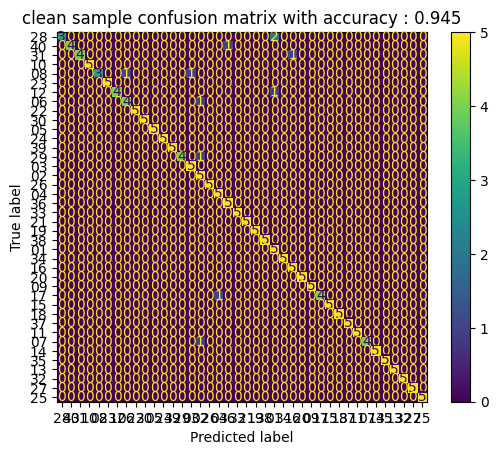

In [42]:
cm = confusion_matrix(true_tracks, predicted_tracks,labels= list(set(true_tracks)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_tracks)))
disp.plot()
plt.title("clean sample confusion matrix with accuracy : {}".format(accuracy_score(true_tracks, predicted_tracks)))
plt.show()

In [43]:
# Set the base directory
base_dir = 'Test Samples/filtered_samples'
dbfile_path = 'fingerprint_database.db'

true_tracks = []
predicted_tracks = []
# Loop over all files in the base directory and its subfolders
for root, dirs, files in os.walk(base_dir):
    for file in files:
        true_track = file[:2]
        true_tracks.append(true_track)
        
        
        samplefile_path = os.path.join(root, file)
        print("identifying sample : ", samplefile_path)
        predicted_track = shazam_obj.identify_sample(samplefile_path, dbfile_path)
        predicted_tracks.append(predicted_track[:2])
        
        print("true_track : ", true_track, " predicted_track : ", predicted_track)


identifying sample :  Test Samples/filtered_samples\01_Bourgade_samples_filtered\01_Bourgade_0.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/filtered_samples\01_Bourgade_samples_filtered\01_Bourgade_1.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/filtered_samples\01_Bourgade_samples_filtered\01_Bourgade_2.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/filtered_samples\01_Bourgade_samples_filtered\01_Bourgade_3.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/filtered_samples\01_Bourgade_samples_filtered\01_Bourgade_4.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/filtered_samples\02_For_the_Better_samples_filtered\02_For_the_Better_0.wav
true_track :  02  predicted_track :  02. For the Better.wav
identifying sample :  Test Samples/filtered_samples\02_For_the_B

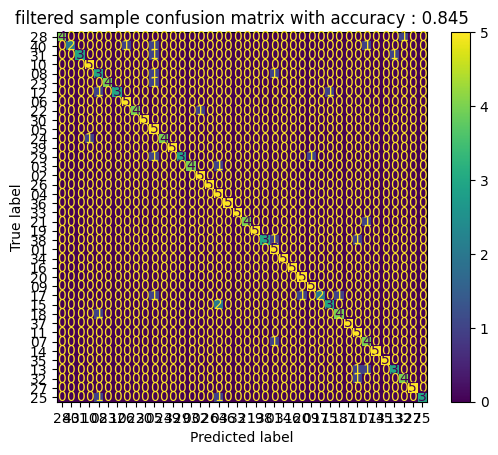

In [44]:
cm = confusion_matrix(true_tracks, predicted_tracks,labels= list(set(true_tracks)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_tracks)))
disp.plot()
plt.title("filtered sample confusion matrix with accuracy : {}".format(accuracy_score(true_tracks, predicted_tracks)))
plt.show()

In [45]:
# Set the base directory
base_dir = 'Test Samples/noisy_samples'
dbfile_path = 'fingerprint_database.db'

noisytrue_tracks = []
noisypredicted_tracks = []
# Loop over all files in the base directory and its subfolders
for root, dirs, files in os.walk(base_dir):
    for file in files:
        true_track = file[:2]
        noisytrue_tracks.append(true_track)
        
        
        samplefile_path = os.path.join(root, file)
        print("identifying sample : ", samplefile_path)
        predicted_track = shazam_obj.identify_sample(samplefile_path, dbfile_path)
        noisypredicted_tracks.append(predicted_track[:2])
        
        print("true_track : ", true_track, " predicted_track : ", predicted_track)

identifying sample :  Test Samples/noisy_samples\01_Bourgade_samples_noisy\01_Bourgade_0.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_samples\01_Bourgade_samples_noisy\01_Bourgade_1.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_samples\01_Bourgade_samples_noisy\01_Bourgade_2.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_samples\01_Bourgade_samples_noisy\01_Bourgade_3.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_samples\01_Bourgade_samples_noisy\01_Bourgade_4.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_samples\02_For_the_Better_samples_noisy\02_For_the_Better_0.wav
true_track :  02  predicted_track :  02. For the Better.wav
identifying sample :  Test Samples/noisy_samples\02_For_the_Better_samples_noisy\02_For_the_Better_1

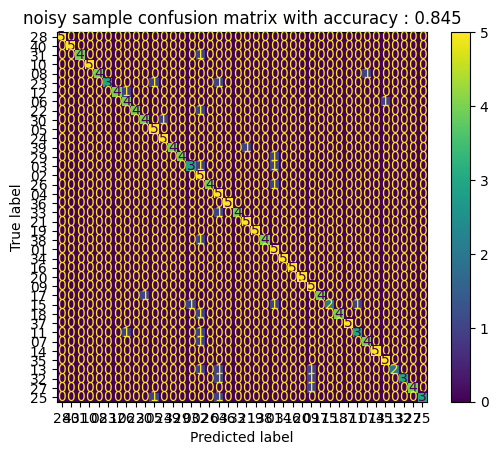

In [46]:
cm = confusion_matrix(noisytrue_tracks, noisypredicted_tracks,labels= list(set(noisytrue_tracks)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(noisytrue_tracks)))
disp.plot()
plt.title("noisy sample confusion matrix with accuracy : {}".format(accuracy_score(noisytrue_tracks, noisypredicted_tracks)))
plt.show()

In [47]:
# Set the base directory
base_dir = 'Test Samples/noisy_filtered_samples'
dbfile_path = 'fingerprint_database.db'

noisy_filtered_true_tracks = []
noisy_filtered_predicted_tracks = []
# Loop over all files in the base directory and its subfolders
for root, dirs, files in os.walk(base_dir):
    for file in files:
        true_track = file[:2]
        noisy_filtered_true_tracks.append(true_track)
        
        
        samplefile_path = os.path.join(root, file)
        print("identifying sample : ", samplefile_path)
        predicted_track = shazam_obj.identify_sample(samplefile_path, dbfile_path)
        noisy_filtered_predicted_tracks.append(predicted_track[:2])
        
        print("true_track : ", true_track, " predicted_track : ", predicted_track)

identifying sample :  Test Samples/noisy_filtered_samples\01_Bourgade_samples_noisy_filtered\01_Bourgade_0.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_filtered_samples\01_Bourgade_samples_noisy_filtered\01_Bourgade_1.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_filtered_samples\01_Bourgade_samples_noisy_filtered\01_Bourgade_2.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_filtered_samples\01_Bourgade_samples_noisy_filtered\01_Bourgade_3.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_filtered_samples\01_Bourgade_samples_noisy_filtered\01_Bourgade_4.wav
true_track :  01  predicted_track :  01. Bourgade.wav
identifying sample :  Test Samples/noisy_filtered_samples\02_For_the_Better_samples_noisy_filtered\02_For_the_Better_0.wav
true_track :  02  predicted_track :  02. For the Bet

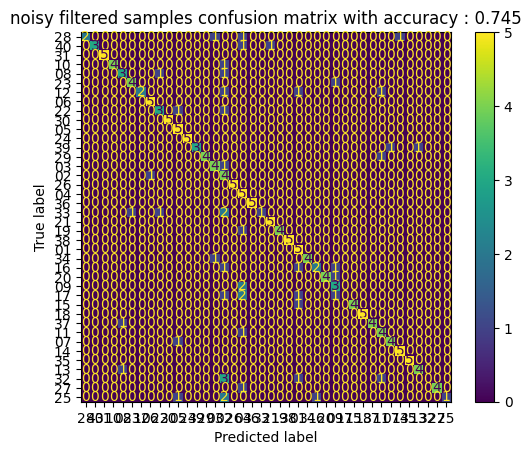

In [48]:
cm = confusion_matrix(noisy_filtered_true_tracks, noisy_filtered_predicted_tracks,labels= list(set(noisy_filtered_true_tracks)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(noisy_filtered_true_tracks)))
disp.plot()
plt.title("noisy filtered samples confusion matrix with accuracy : {}".format(accuracy_score(noisy_filtered_true_tracks, noisy_filtered_predicted_tracks)))
plt.show()